In [13]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('brfss_for_bda_2021.csv', low_memory=False)


In [14]:
#Select features and remove missing values

new = ["GENHLTH", "INCOME2", "_EDUCAG" ]

missing = ["Refused", "Don't know/Not Sure", 0, 0.0, 12337, 12331, "Don't know/Not sure/Missing", "Don't know/Not sure", "Not asked or Missing", "Don't know/Not sure/Missing"]
for i in range(len(new)):
    for j in range(len(missing)):
        dropNames = df[df[new[i]] == missing[j]].index
        df.drop(dropNames , inplace=True)


In [15]:
# Convert categorical values to numerical for clearer visualisation
# Converting them to numbers lets them be processed as an ordinal feature in an ML algorithm 

for i in df.index:
    if df.at[i, "INCOME2"] == "$75,000 or more":
        df.at[i, "INCOME2"] = 80000
    elif df.at[i, "INCOME2"] == "Less than $75,000 ($50,000 to less than $75,000)":
        df.at[i, "INCOME2"] = 65000
    elif df.at[i, "INCOME2"] == "Less than $50,000 ($35,000 to less than $50,000)":
        df.at[i, "INCOME2"] = 45000
    elif df.at[i, "INCOME2"] == "Less than $35,000 ($25,000 to less than $35,000)":
        df.at[i, "INCOME2"] = 30000
    elif df.at[i, "INCOME2"] == "Less than $25,000 ($20,000 to less than $25,000)":
        df.at[i, "INCOME2"] = 23000
    elif df.at[i, "INCOME2"] == "Less than $20,000 ($15,000 to less than $20,000)":
        df.at[i, "INCOME2"] = 17000
    elif df.at[i, "INCOME2"] == "Less than $15,000 ($10,000 to less than $15,000)":
        df.at[i, "INCOME2"] = 13000
    elif df.at[i, "INCOME2"] == "Less than $10,000":
        df.at[i, "INCOME2"] = 5000

#df.INCOME2.value_counts(sort= True).plot.bar()

#df.INCOME2.value_counts() 

In [16]:
# Convert categorical values to numerical for clearer visualisation
# Converting them to numbers lets them be processed as an ordinal feature in an ML algorithm 


for i in df.index:
    if df.at[i, "GENHLTH"] == "Excellent":
        df.at[i, "GENHLTH"] = 5
    elif df.at[i, "GENHLTH"] == "Very good":
        df.at[i, "GENHLTH"] = 4
    elif df.at[i, "GENHLTH"] == "Good":
        df.at[i, "GENHLTH"] = 3
    elif df.at[i, "GENHLTH"] == "Fair":
        df.at[i, "GENHLTH"] = 2
    elif df.at[i, "GENHLTH"] == "Poor":
        df.at[i, "GENHLTH"] = 1
   



#df.GENHLTH.value_counts(sort= True).plot.bar()
#df.GENHLTH.value_counts() 
df.GENHLTH = df.GENHLTH.astype(int)


In [17]:
# Convert categorical values to numerical for clearer visualisation
# Converting them to numbers lets them be processed as an ordinal feature in an ML algorithm 


for i in df.index:
    if df.at[i, "_EDUCAG"] == "Graduated from College or Technical School":
        df.at[i, "_EDUCAG"] = 4
    elif df.at[i, "_EDUCAG"] == "Attended College or Technical School":
        df.at[i, "_EDUCAG"] = 3
    elif df.at[i, "_EDUCAG"] == "Graduated High School":
        df.at[i, "_EDUCAG"] = 2
    elif df.at[i, "_EDUCAG"] == "Did not graduate High School":
        df.at[i, "_EDUCAG"] = 1

#df._EDUCAG.value_counts(sort= True).plot.bar()
#df._EDUCAG.value_counts() 


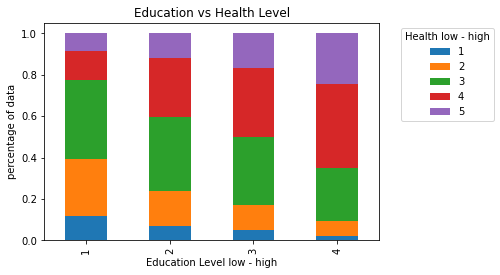

In [18]:
# This plot is normalized. It shows there is some correlation between education and health.

df_plot_edu = df.groupby(['_EDUCAG', 'GENHLTH']).size().reset_index().pivot(columns='GENHLTH', index='_EDUCAG', values=0)

df_plot_edu = df_plot_edu.div(df_plot_edu.sum(1), axis=0)

df_plot_edu.plot(kind='bar', stacked=True, title = "Education vs Health Level", xlabel = "Education Level low - high", ylabel = "percentage of data").legend( title='Health low - high', bbox_to_anchor=(1.05, 1), loc='upper left')

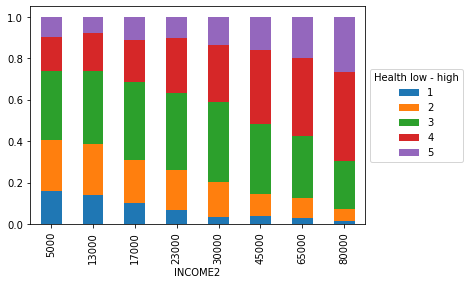

In [19]:
# This plot is normalized. It shows there is some correlation between income and health.

df_plot = df.groupby(['INCOME2', 'GENHLTH']).size().reset_index().pivot(columns='GENHLTH', index='INCOME2', values=0)

df_plot = df_plot.div(df_plot.sum(1), axis=0)

df_plot.plot(kind='bar', stacked=True).legend( title='Health low - high',loc='center left',bbox_to_anchor=(1.0, 0.5))